# Exercise 2

**Please Note**: We updated the requirements.txt

Please install the new requirements before editing this exercise.

## Import packages

In [1]:
import os

from vll.utils.download import download_mnist
import numpy as np
import matplotlib.pyplot as plt

import skimage
import skimage.io

import torch
import torch.nn.functional as F
from torchvision import transforms

from models.mnist.simple_cnn import Net

## Task 1
(2 points)

In this task, you will learn some basic tensor operations using the PyTorch library.

Reference for torch: https://pytorch.org/docs/stable/torch.html

In [2]:
# Create a numpy array that looks like this: [0, 1, 2, ..., 19]
arr = np.arange(20)
print("NumPy array:", arr)

# Convert the numpy array to a torch tensor
tensor = torch.from_numpy(arr)
print("Tensor from NumPy:", tensor)

# Create a tensor that contains random numbers.
# It should have the same size like the numpy array.
# Multiply it with the previous tensor.
rand_tensor = torch.rand_like(tensor, dtype=torch.float32)  # same shape as tensor
tensor = tensor.float() * rand_tensor
print("After multiplying with random tensor:", tensor)

# Create a tensor that contains only 1s.
# It should have the same size like the numpy array.
# Subtract it from the previous tensor.
tensor = tensor - torch.ones_like(tensor)
print("After subtracting ones:", tensor)

# Get the 5th element using an index.
element = tensor[4]  # index starts from 0
print("5th element:", element.item())

# Create a tensor that contains only 0s.
# It should have the same size like the numpy array.
# Multiply it with the previous tensor without any assignment (in place).
zeros = torch.zeros_like(tensor)
tensor.mul_(zeros)   # in-place multiplication
print("After in-place multiply with zeros:", tensor)

NumPy array: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Tensor from NumPy: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])
After multiplying with random tensor: tensor([ 0.0000,  0.2415,  1.7828,  1.5379,  3.3400,  4.1319,  3.2116,  0.6792,
         3.7440,  4.8463,  9.3428,  8.1459,  6.4283,  5.7308,  1.2852,  4.0356,
        12.4795,  1.6002, 11.8377, 17.2236])
After subtracting ones: tensor([-1.0000, -0.7585,  0.7828,  0.5379,  2.3400,  3.1319,  2.2116, -0.3208,
         2.7440,  3.8463,  8.3428,  7.1459,  5.4283,  4.7308,  0.2852,  3.0356,
        11.4795,  0.6002, 10.8377, 16.2236])
5th element: 2.339956045150757
After in-place multiply with zeros: tensor([-0., -0., 0., 0., 0., 0., 0., -0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [27]:
import torch
import numpy as np
from PIL import Image

# Load the image from the last exercise as RGB image.
image = Image.open("./data/pepo.jpg").convert("RGB")

# Convert the image to a tensor
image = torch.tensor(np.array(image))
print("Original tensor shape:", image.shape)  # e.g. [H, W, 3]

# Flatten the image
image = torch.flatten(image)
print("Flattened length:", len(image))  # H * W * 3

# Add another dimension resulting in a 1xN tensor
image = image.unsqueeze(0)
print("After unsqueeze:", image.shape)

# Revert the last action
image = image.squeeze(0)
print("After squeeze:", image.shape)

# Reshape the tensor, so that it has the original 2D dimensions
# 自動偵測原始影像大小
img_arr = np.array(Image.open("./data/pepo.jpg").convert("RGB"))
H, W, C = img_arr.shape
image = image.reshape(H, W, C)
print("Reshaped to original:", image.shape)

# Calculate the sum, mean and max of the tensor
print("Sum:", torch.sum(image))
print("Mean:", torch.mean(image.float()))  # 轉成 float 避免 overflow
print("Max:", torch.max(image))


Original tensor shape: torch.Size([512, 512, 3])
Flattened length: 786432
After unsqueeze: torch.Size([1, 786432])
After squeeze: torch.Size([786432])
Reshaped to original: torch.Size([512, 512, 3])
Sum: tensor(91404741)
Mean: tensor(116.2271)
Max: tensor(255, dtype=torch.uint8)


## Task 2
(2 points)

Use Autograd to perform operations on a tensor and output then gradients.

In [5]:
import torch

# Create a random 2x2 tensor which requires gradients
x = torch.randn(2, 2, requires_grad=True)
print(x)

# Create another tensor by adding 2.0
y = x + 2.0
print(y)

# Create a third tensor z = y^2
z = y ** 2
print(z)

# Compute out as the mean of values in z
out = z.mean()
print(out)

# Perform back propagation on out
out.backward()

# Print the gradients dout/dx
print("x.grad =\n", x.grad)

# (Optional) sanity check: for z = (x+2)^2 and out = mean(z),
# d(out)/dx = (1/4) * 2*(x+2) = (x+2)/2 = y/2  (since 2x2 -> 4 elements)
print("Expected grad (y/2) =\n", y.detach() / 2)

# Create a copy of y without gradients
y2 = y.detach().clone()
print(y2.requires_grad)

# Perform the mean operation on z with gradients globally disabled
with torch.no_grad():
    out_nograd = z.mean()
    print("mean(z) with no_grad =", out_nograd, "| requires_grad:", out_nograd.requires_grad)


tensor([[-0.6461, -0.4023],
        [ 0.6247,  0.0625]], requires_grad=True)
tensor([[1.3539, 1.5977],
        [2.6247, 2.0625]], grad_fn=<AddBackward0>)
tensor([[1.8331, 2.5526],
        [6.8891, 4.2540]], grad_fn=<PowBackward0>)
tensor(3.8822, grad_fn=<MeanBackward0>)
x.grad =
 tensor([[0.6770, 0.7988],
        [1.3124, 1.0313]])
Expected grad (y/2) =
 tensor([[0.6770, 0.7988],
        [1.3124, 1.0313]])
False
mean(z) with no_grad = tensor(3.8822) | requires_grad: False


## Task 3
(3 points)

Implement a Dataset class for MNIST.

In [6]:
# We first download the MNIST dataset
download_mnist()

Extract mnist.tar.gz
Done!


In [31]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset

class MNIST(Dataset):
    """
    Dataset class for MNIST laid out as:
    root/
      0/*.png|jpg
      1/*.png|jpg
      ...
      9/*.png|jpg
    """

    IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp")

    def __init__(self, root, transform=None):
        """
        root -- path to either "training" or "testing"
        transform -- transform (from torchvision.transforms)
                     to be applied to the data
        """
        if not os.path.isdir(root):
            raise FileNotFoundError(f"Root folder not found: {root}")

        self.root = root
        self.transform = transform

        # 1) 找出 0~9 的子資料夾（類別）
        self.class_dirs = sorted(
            [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
        )

        # 2) 建立 (image_path, label) 清單
        self.image_paths = []
        for label_str in self.class_dirs:
            class_dir = os.path.join(root, label_str)
            # 只接受 0~9 當標籤
            try:
                label = int(label_str)
            except ValueError:
                # 若不是數字資料夾，略過
                continue

            for fname in os.listdir(class_dir):
                if fname.lower().endswith(self.IMG_EXTS):
                    self.image_paths.append((os.path.join(class_dir, fname), label))

        #（可選）如果沒有找到影像，提醒一下
        if len(self.image_paths) == 0:
            raise RuntimeError(f"No images found under '{root}'. "
                               f"Expected structure like '{root}/0/*.png' ... '{root}/9/*.png'.")

    def __len__(self):
        """Returns the length of the dataset (number of images)."""
        return len(self.image_paths)

    def __getitem__(self, index):
        """
        Loads and returns one image as floating point numpy array (or transformed tensor)
        index -- image index in [0, self.__len__() - 1]
        """
        image_path, label = self.image_paths[index]

        # 讀取為灰階（MNIST），若你的圖是 RGB 可改成 "RGB"
        img = Image.open(image_path).convert("L")

        # 若你會用 transforms.ToTensor()，可以直接把 PIL Image 丟給 transform，
        # 讓 ToTensor 幫你轉成 [0,1] 的 torch.FloatTensor（形狀 [1,H,W]）
        if self.transform is not None:
            img = self.transform(img)
        else:
            # 不用 transform 的話，回傳 numpy float32（區間 [0,1]）
            img = np.array(img, dtype=np.float32) / 255.0

        return img, label
    print("done")


done


## Task 4
(3 points)

You can now load a pretrained neural network model we provide.
Your last task is to run the model on the MNIST test dataset, plot some example images with the predicted labels and compute the prediction accuracy.

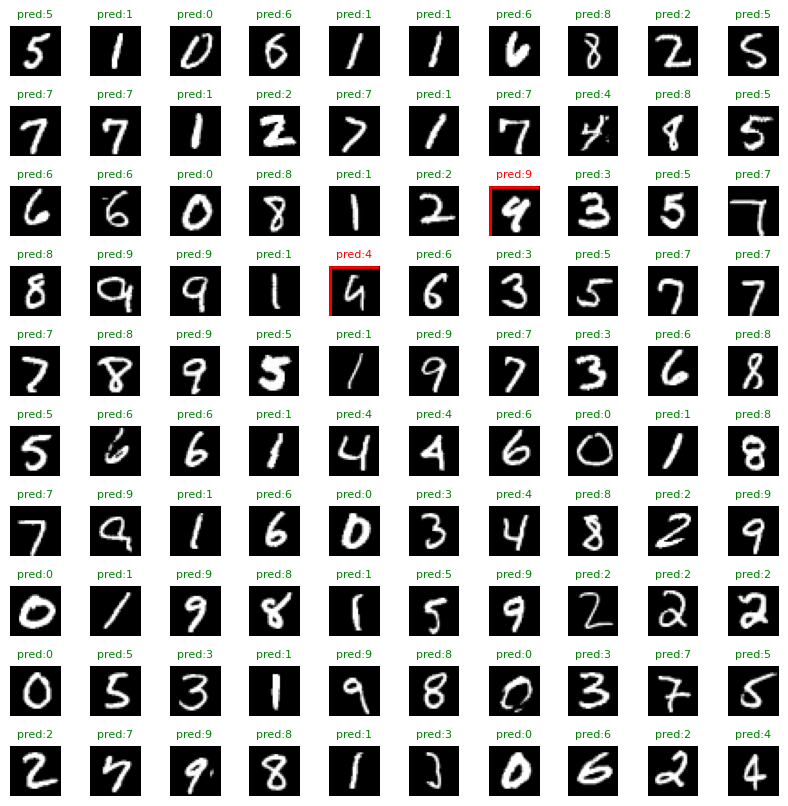

Accuracy: 98.32%  (9832/10000)


In [ ]:
def validate(model, data_loader):
    # TODO: Create a 10x10 grid of subplots
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))
    axes = axes.reshape(-1)
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    model.eval()
    correct = 0  # count for correct predictions
    total = 0

    mean, std = 0.1307, 0.3081  # 對應 Normalize 的參數
    device = next(model.parameters()).device

    with torch.no_grad():
        for i, item in enumerate(data_loader):
            # TODO: unpack item into image and ground truth
            #       and run network on them
            img, gt = item  # batch_size=1 -> img: [1,1,28,28], gt: [1]
            img = img.to(device)
            gt = gt.to(device)

            logits = model(img)               # [1,10]

            # TODO: get class with highest probability
            pred = logits.argmax(dim=1)       # [1]

            # TODO: check if prediction is correct
            #       and add it to correct count
            correct += (pred == gt).sum().item()
            total += gt.size(0)

            # plot the first 100 images
            if i < 100:
                # TODO: compute position of ith image in the grid
                ax = axes[i]

                # TODO: convert image tensor to numpy array
                #       and normalize to [0, 1]
                # 反正規化回 [0,1]
                vis = (img[0] * std + mean).clamp(0, 1).squeeze(0).squeeze(0).detach().cpu().numpy()

                # TODO: make wrongly predicted images red
                ok = (pred[0].item() == gt[0].item())
                ax.imshow(vis, cmap="gray", vmin=0.0, vmax=1.0)
                if not ok:
                    # 紅框
                    h, w = vis.shape
                    ax.add_patch(plt.Rectangle((0, 0), w, h, fill=False, linewidth=2, edgecolor="red"))

                # TODO: disable axis and show image
                ax.axis("off")

                # TODO: show the predicted class next to each image
                ax.set_title(f"pred:{pred[0].item()}", fontsize=8, color=("green" if ok else "red"))

            elif i == 100:
                plt.show()

    # TODO: compute and print the prediction accuracy in percent
    acc = 100.0 * correct / max(1, total)
    print(f"Accuracy: {acc:.2f}%  ({correct}/{total})")


# create a DataLoader using the implemented MNIST dataset class
data_loader = torch.utils.data.DataLoader(
    MNIST('data/mnist/testing',
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=1, shuffle=True)

# create the neural network
model = Net()

# load the statedict from 'models/mnist/simple_cnn.pt'
# 若在 CPU 上跑可用 map_location="cpu"
model.load_state_dict(torch.load('models/mnist/simple_cnn.pt', map_location='cpu'))

# validate the model
validate(model, data_loader)
